## Texi Guru Kaggle Challange

### important imports and data extraction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error

### Importing data

In [2]:
try: # For kaggle
  train_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

  test_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
  print('running on kaggle')
except: #for local machine 
  print('running on local machine')
  train_pd = pd.read_csv('train.csv')
  test_pd = pd.read_csv('test.csv')
  pass
copy_train_pd = train_pd.copy()
copy_test_pd = test_pd.copy()
train_pd.info()

running on local machine
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amoun

null vales detection 

In [3]:
train_pd.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

**Creating copies of test data and train data**

In [4]:
train_pd = copy_train_pd.copy()
# TODO: will check and can be done after applying preprocessing
# y = train_pd['total_amount']
# X = train_pd.drop('total_amount', axis= 1)
# list_of_features = list()

In [5]:
x_train, x_test = train_test_split(train_pd, test_size= 0.1)
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()

### Preprocessing section
* Selection of important features
* transformation of features
* features plotting
* correlation detection among features
* apply pca for dimensionality reduction



In [6]:
print('Null values in the given training data set is:')
x_train.isna().sum()

Null values in the given training data set is:


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          5519
trip_distance               0
RatecodeID               5519
store_and_fwd_flag       5519
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     5519
Airport_fee              5519
dtype: int64

In [7]:
print(f'''
unique values of passanger_count is: {x_train['passenger_count'].unique()}\n
unique values of RateCodeId is: {x_train['RatecodeID'].unique()}\n
unique values of store_and_fwd_flag is: {x_train['store_and_fwd_flag'].unique()}\n
unique values of congestion_surcharge is: {x_train['congestion_surcharge'].unique()}\n
unqiue values of airport_fees is: {x_train['Airport_fee'].unique()}\n
''')



unique values of passanger_count is: [ 1.  3.  4.  2.  6. nan  0.  5.  9.  8.]

unique values of RateCodeId is: [ 1.  2. nan 99.  3.  5.  4.]

unique values of store_and_fwd_flag is: ['N' nan 'Y']

unique values of congestion_surcharge is: [ 0.   2.5  nan -2.5]

unqiue values of airport_fees is: [ 1.75  0.     nan -1.75]




**According to my observations vendorId is also an categorical vairable and ratecodeid also becuase these items are ids which are represented as numbers**

In [8]:
print(f''' 
unique values for vendorId is: {x_train['VendorID'].unique()}\n
unique values for RateCodeId is: {x_train['RatecodeID'].unique()}\n
unique valuse for PULocationID is: {x_train['PULocationID'].unique()}\n
unique valuse for DoLocationID is: {x_train['DOLocationID'].unique()}\n
''')

 
unique values for vendorId is: [1 0 2]

unique values for RateCodeId is: [ 1.  2. nan 99.  3.  5.  4.]

unique valuse for PULocationID is: [ 39 136 170 150  69   6   9 213  31 118 259 193 195 180  54 156 257 133
  60 192   4 172 215 175 103  20 223 131  53 122  94  32 165 190  14  88
 113 153 168 238 143 256 163  85  21 152  81 109  28 200 124 262  99 155
  24 240 250 263 140 186 100  42  30  13 225  90  23 189 162 120  82 164
 226 220 130 202 210 144 107 245 149  49 128 253 230 141 233  15 137  91
 191 154 178 126  45  77 171  51 161 209  55   2  19   7 204 148 229  87
  74 196 221 146  34  47  46  78  25 101 219 159 260  36   5 183  67 264
 117 173 119 228 145 232  10 236 237  16 158 160  50  37 242  98  40 201
  48 218 246  95 181  75  65  76 184 222  57 121  61 243 254 207 198  92
 249 231 211  80 132 108  83 104 142  18 116 138  41 102 185  72 123 241
 110  11 216  43  84  62 235 239 208 134 179 247 169   8 212  12 258 115
 227 261 135 127 214 252 174 255  93 105  66  70  52 111

In [9]:
x_train.describe() #* Description of complete data elements

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,157500.000000,151981.000000,157500.000000,151981.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,151981.000000,151981.000000
mean,0.728229,1.358426,5.313255,1.524697,132.852298,132.687549,1.933488,6.131014,0.647409,0.979665,29.662874,2.246745,0.158844
std,0.445744,0.891255,416.332763,6.562537,76.132916,76.142065,1.948310,4.634340,2.325076,0.198832,25.407885,0.819492,0.512111
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-305.300000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.475564,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286109,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.620000,1.000000,199.000000,198.000000,2.500000,7.505736,0.000000,1.000000,31.850000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


### Plot chart preparation
plots different types of plots for batter insight

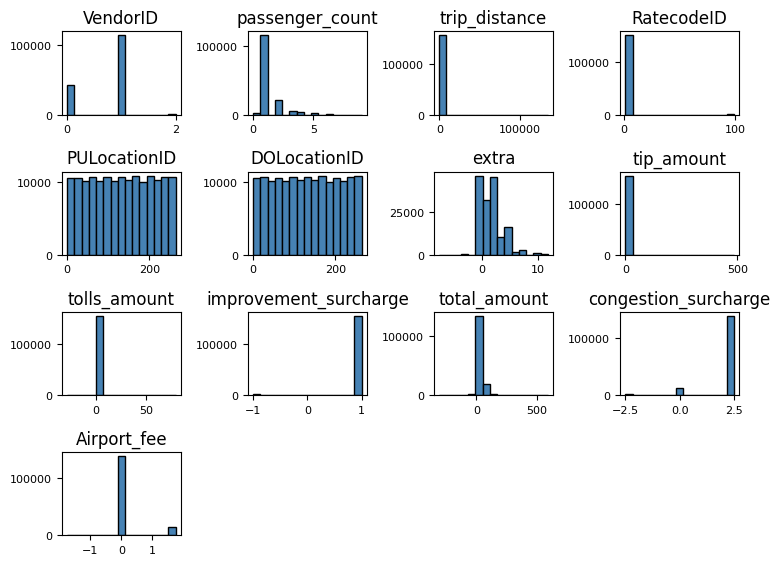

In [10]:
x_train.hist(bins= 15, color= 'steelblue', edgecolor='black', linewidth= 1.0,
             xlabelsize= 8, ylabelsize= 8, grid= False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

### plotting pair waise plot for corelation detection

In [11]:
# sns.pairplot(X) ## Do not run this cell again
#* please prefer pairplot.png for details

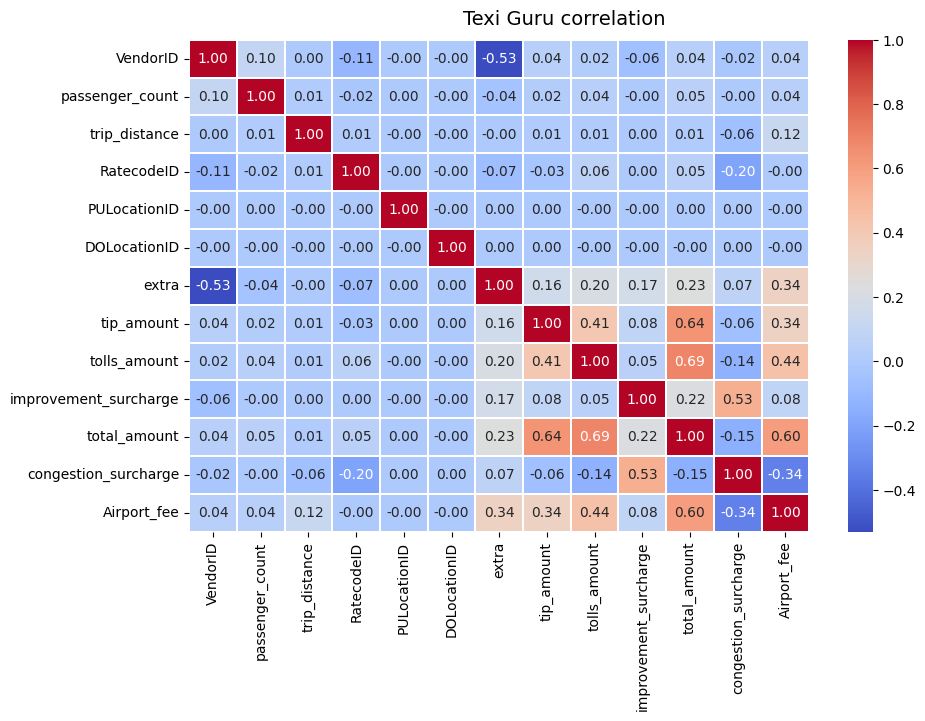

In [12]:
f, ax = plt.subplots(figsize=(10,6))
corr = x_train.corr(numeric_only= True)
heat_map = sns.heatmap(round(corr, 2), annot= True, ax=ax, cmap='coolwarm',
                       fmt='.2f', linewidths=0.05)
f.subplots_adjust(top= 0.93)
t = f.suptitle('Texi Guru correlation', fontsize= 14)


#### Converting datetime into datetime object

In [13]:
def convert_dt_obj_to_datetime(df:pd.DataFrame, col_name:str):
    df[col_name] = pd.to_datetime(df[col_name])
    df[col_name +'_Year'] = df[col_name].apply(lambda time: time.year)
    df[col_name +'_Month'] = df[col_name].apply(lambda time: time.month)
    df[col_name +'_Day'] = df[col_name].apply(lambda time: time.day)
    df[col_name +'_Hour'] = df[col_name].apply(lambda time: time.hour)
#     df[col_name +'_Minute'] = df[col_name].apply(lambda time: time.minute) # IGNORING MINS

In [14]:
x_train, x_test = x_train_copy.copy(), x_test_copy.copy()

convert_dt_obj_to_datetime(x_train, 'tpep_pickup_datetime')
convert_dt_obj_to_datetime(x_test, 'tpep_pickup_datetime')
x_train = x_train.drop('tpep_pickup_datetime', axis= 1)
x_test = x_test.drop('tpep_pickup_datetime', axis= 1)

convert_dt_obj_to_datetime(x_train, 'tpep_dropoff_datetime')
convert_dt_obj_to_datetime(x_test, 'tpep_dropoff_datetime')

x_train = x_train.drop('tpep_dropoff_datetime', axis= 1)
x_test = x_test.drop('tpep_dropoff_datetime', axis= 1)

x_train.info()
x_train_copy, x_test_copy = x_train.copy(), x_test.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 157500 entries, 34352 to 45949
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   VendorID                     157500 non-null  int64  
 1   passenger_count              151981 non-null  float64
 2   trip_distance                157500 non-null  float64
 3   RatecodeID                   151981 non-null  float64
 4   store_and_fwd_flag           151981 non-null  object 
 5   PULocationID                 157500 non-null  int64  
 6   DOLocationID                 157500 non-null  int64  
 7   payment_type                 157500 non-null  object 
 8   extra                        157500 non-null  float64
 9   tip_amount                   157500 non-null  float64
 10  tolls_amount                 157500 non-null  float64
 11  improvement_surcharge        157500 non-null  float64
 12  total_amount                 157500 non-null  float64
 13  c

In [15]:
x_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,congestion_surcharge,Airport_fee,tpep_pickup_datetime_Year,tpep_pickup_datetime_Month,tpep_pickup_datetime_Day,tpep_pickup_datetime_Hour,tpep_dropoff_datetime_Year,tpep_dropoff_datetime_Month,tpep_dropoff_datetime_Day,tpep_dropoff_datetime_Hour
count,157500.000000,151981.000000,157500.000000,151981.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,...,151981.000000,151981.000000,157500.0,157500.000000,157500.000000,157500.000000,157500.0,157500.000000,157500.000000,157500.000000
mean,0.728229,1.358426,5.313255,1.524697,132.852298,132.687549,1.933488,6.131014,0.647409,0.979665,...,2.246745,0.158844,2023.0,6.004241,29.061683,15.121378,2023.0,6.007689,28.971124,15.109746
std,0.445744,0.891255,416.332763,6.562537,76.132916,76.142065,1.948310,4.634340,2.325076,0.198832,...,0.819492,0.512111,0.0,0.064987,1.973947,5.769302,0.0,0.087349,2.568944,5.947542
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,...,-2.500000,-1.750000,2023.0,6.000000,1.000000,0.000000,2023.0,6.000000,1.000000,0.000000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.475564,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,11.000000,2023.0,6.000000,29.000000,11.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286109,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,16.000000,2023.0,6.000000,29.000000,17.000000
75%,1.000000,1.000000,3.620000,1.000000,199.000000,198.000000,2.500000,7.505736,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,30.000000,20.000000,2023.0,6.000000,30.000000,20.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,...,2.500000,1.750000,2023.0,7.000000,30.000000,23.000000,2023.0,7.000000,30.000000,23.000000


### trying to remove outliers form the dataset

In [16]:
x_train = x_train_copy.copy() # reseting dataset
# print('len of wallet user', len(x_train[x_train.payment_type == 'Wallet']))
# train_pd_filtered_toll_amt = x_train[(x_train.tolls_amount >= 0)]
# print('len of wallet user', len(train_pd_filtered_toll_amt[train_pd_filtered_toll_amt.payment_type == 'Wallet']))
# train_pd_filtered_extra = train_pd_filtered_toll_amt[(train_pd_filtered_toll_amt.extra >= 0)]
# print('len of wallet user', len(train_pd_filtered_extra[train_pd_filtered_extra.payment_type == 'Wallet']))
# # train_pd_filtered_airport_fee = train_pd_filtered_extra.copy() # TODO: need to check for batter solution 
# print('airport unique values before filter', train_pd_filtered_extra.Airport_fee.unique())
# train_pd_filtered_airport_fee =  train_pd_filtered_extra[(train_pd_filtered_extra.Airport_fee != -1.75)]
# print('airport unique values after filter', train_pd_filtered_airport_fee.Airport_fee.unique())
# print('len of wallet user', len(train_pd_filtered_airport_fee[train_pd_filtered_airport_fee.payment_type == 'Wallet']))
# ## same assumption with negative congestion surcharge and improvement surcharge
# train_pd_filtered_improvement_surcharge = train_pd_filtered_airport_fee[(train_pd_filtered_airport_fee.improvement_surcharge >= 0)]
# print('len of wallet user', len(train_pd_filtered_improvement_surcharge[train_pd_filtered_improvement_surcharge.payment_type == 'Wallet']))
# print('congestion surcharge unique', train_pd_filtered_improvement_surcharge['congestion_surcharge'].unique())
# train_pd_filtered_congestion_surcharge = train_pd_filtered_improvement_surcharge.copy() #TODO: need to check batter solution
# # train_pd_filtered_congestion_surcharge = train

# print('len of wallet user', len(train_pd_filtered_congestion_surcharge[train_pd_filtered_congestion_surcharge.payment_type == 'Wallet']))

# x_train = train_pd_filtered_congestion_surcharge.copy()
# print('vendor ids after outlier removal', x_train.VendorID.unique())

# # x_train.info()
# print('len of wallet user', len(x_train[x_train.payment_type == 'Wallet']))


In [17]:
### removing distance outliers
print(len(x_train[x_train.trip_distance > 100]))
x_train_distance_fitler = x_train[x_train.trip_distance <= 100]
x_train = x_train_distance_fitler.copy()
print('vendor ids after outlier removal', x_train.VendorID.unique())
print('len of wallet user', len(x_train[x_train.payment_type == 'Wallet']))

7
vendor ids after outlier removal [1 0 2]
len of wallet user 5516


**X_train after applying basic filteration of the data**

In [18]:
x_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,congestion_surcharge,Airport_fee,tpep_pickup_datetime_Year,tpep_pickup_datetime_Month,tpep_pickup_datetime_Day,tpep_pickup_datetime_Hour,tpep_dropoff_datetime_Year,tpep_dropoff_datetime_Month,tpep_dropoff_datetime_Day,tpep_dropoff_datetime_Hour
count,157493.000000,151977.000000,157493.000000,151977.000000,157493.000000,157493.000000,157493.000000,157493.000000,157493.000000,157493.000000,...,151977.000000,151977.000000,157493.0,157493.000000,157493.000000,157493.000000,157493.0,157493.000000,157493.000000,157493.000000
mean,0.728223,1.358429,3.676328,1.524658,132.851301,132.688100,1.933556,6.131090,0.647232,0.979664,...,2.246804,0.158825,2023.0,6.004241,29.061679,15.121504,2023.0,6.007683,28.971294,15.110126
std,0.445747,0.891264,4.858387,6.562611,76.132957,76.142125,1.948316,4.634387,2.324555,0.198836,...,0.819421,0.512085,0.0,0.064988,1.973990,5.769170,0.0,0.087315,2.568033,5.947299
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,...,-2.500000,-1.750000,2023.0,6.000000,1.000000,0.000000,2023.0,6.000000,1.000000,0.000000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.475602,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,11.000000,2023.0,6.000000,29.000000,11.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286128,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,16.000000,2023.0,6.000000,29.000000,17.000000
75%,1.000000,1.000000,3.620000,1.000000,199.000000,198.000000,2.500000,7.505813,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,30.000000,20.000000,2023.0,6.000000,30.000000,20.000000
max,2.000000,9.000000,84.160000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,...,2.500000,1.750000,2023.0,7.000000,30.000000,23.000000,2023.0,7.000000,30.000000,23.000000


#### Basic outlier removal completed 


### Creating pipeline for linear regression and SGD Regression
* create pipelines for features scaling
* create shufflesplit for cross validation

In [19]:
cv_shuffle_20 = ShuffleSplit(n_splits= 20, test_size= 0.2)
cv_shuffle_5 = ShuffleSplit(n_splits= 5, test_size= 0.2)

In [20]:
x_train_filtered_copy = x_train.copy()

In [21]:
x_train = x_train_filtered_copy.copy()
x_test = x_test_copy.copy()
y_train = x_train['total_amount']
x_train = x_train.drop('total_amount', axis= 1)
y_test = x_test['total_amount']
x_test = x_test.drop('total_amount', axis= 1)

### dividing train set into com_train_set and dev_train_set


In [22]:
com_train_features, dev_test_features, com_train_labels, dev_test_labels = train_test_split(x_train, y_train, test_size= 0.2)

#### Creating pipelines for features scaling

In [23]:
vendor_id_pipe = Pipeline([
  ('one_hot_encoder', OneHotEncoder())
])
passanger_count_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 1)),
    ('std_scaler', StandardScaler())
])

rate_code_id_pipe = Pipeline([
       ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant',
                                         fill_value= 1))
    #    ('one_hot_encoder', OneHotEncoder()) ## TODO: experimental changes
])

store_and_fwd_pipe = Pipeline([
    ('simple_immmputer', SimpleImputer(missing_values= np.nan, strategy='constant', fill_value='N')),
    ('one_hot_encoder', OneHotEncoder())
])
congestion_charger_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
    ('std_scaler', StandardScaler())
])

airport_fee_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
    ('std_scale', StandardScaler())
])

payment_type_pipe = Pipeline([
    ('one_hot_encoder', OneHotEncoder())
])

In [24]:
feature_scaline_pipeline = ColumnTransformer([
  ('vendor_id', vendor_id_pipe, ['VendorID']),
  ('passanger_count', passanger_count_pipe, ['passenger_count']),
  ('rate_code_id', rate_code_id_pipe, ['RatecodeID']), # experimental changes
  ('s_nd_f_flag', store_and_fwd_pipe, ['store_and_fwd_flag']),
  ('pu_loc', StandardScaler(), ['PULocationID']),
  ('du_loc', StandardScaler(), ["DOLocationID"]),
  ('payment_t', payment_type_pipe, ['payment_type']),
  ('extra_t', StandardScaler(), ['extra']),
  ('tip_amount_t', StandardScaler(), ['tip_amount']),
  ('tolls_amount_t', StandardScaler(), ["tolls_amount"]),
  ('improvement_c', StandardScaler(), ['improvement_surcharge']),
  ('cong_charge', congestion_charger_pipe, ['congestion_surcharge']),
  ('Airport_fee_t', airport_fee_pipe, ['Airport_fee']),
  ('std_scaler', StandardScaler(), [i for i in range(14, 22)])
], remainder='passthrough')
feature_scaline_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('vendor_id',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder())]),
                                 ['VendorID']),
                                ('passanger_count',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=1,
                                                                strategy='constant')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['passenger_count']),
                                ('rate_code_id',
                                 Pipeline(steps=[('simple_imputer',
                                                  Simple...
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['congestion_surcharge']),
                                ('Airport_fee_t',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('std_scale',
                                                  StandardScaler())]),
                                 ['Airport_fee']),
                                ('std_scaler', StandardScaler(),
                                 [14, 15, 16, 17, 18, 19, 20, 21])])

### creating a linear regression model

In [25]:
lin_reg_pipeline = Pipeline([
  ('feature_scaling', feature_scaline_pipeline),
  ('lin_reg', LinearRegression())
])

lin_reg_pipeline.fit(com_train_features, com_train_labels)

Pipeline(steps=[('feature_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vendor_id',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['VendorID']),
                                                 ('passanger_count',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count']),
                                                 ('rate_code_id',
                                                  Pipel...
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['congestion_surcharge']),
                                                 ('Airport_fee_t',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Airport_fee']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21])])),
                ('lin_reg', LinearRegression())])

In [26]:
lin_reg_pipeline.score(com_train_features, com_train_labels)

0.8703171489510559

In [27]:
lin_reg_pipeline.score(dev_test_features, dev_test_labels)

0.8624630537366198

In [28]:
lin_reg_pipeline.score(x_test, y_test)

0.7874863993383105

## transforming test

In [29]:
# x_test_t = lin_reg_pipeline.transform(x_test)
print(x_train.VendorID.unique())
print(x_test.VendorID.unique())

# x_test_t = feature_scaline_pipeline.transform(x_test)
lin_reg_pipeline.score(x_test, y_test)

[1 0 2]
[1 0 2]


0.7874863993383105

### Submission code starting from here

In [30]:
copy_test_pd.copy()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,2023-06-29 17:41:59,2023-06-29 18:30:36,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00
49996,1,2023-06-30 01:25:25,2023-06-30 01:10:40,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75
49997,1,2023-06-30 22:28:44,2023-06-30 21:49:37,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00
49998,0,2023-06-30 02:37:18,2023-06-30 02:10:33,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00


In [31]:
test_pd_t = copy_test_pd.copy()
convert_dt_obj_to_datetime(test_pd_t, 'tpep_pickup_datetime')
test_pd_t = test_pd_t.drop('tpep_pickup_datetime', axis= 1)
test_pd_t.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   VendorID                    50000 non-null  int64  
 1   tpep_dropoff_datetime       50000 non-null  object 
 2   passenger_count             48221 non-null  float64
 3   trip_distance               50000 non-null  float64
 4   RatecodeID                  48221 non-null  float64
 5   store_and_fwd_flag          48221 non-null  object 
 6   PULocationID                50000 non-null  int64  
 7   DOLocationID                50000 non-null  int64  
 8   payment_type                50000 non-null  object 
 9   extra                       50000 non-null  float64
 10  tip_amount                  50000 non-null  float64
 11  tolls_amount                50000 non-null  float64
 12  improvement_surcharge       50000 non-null  float64
 13  congestion_surcharge        482

In [32]:
convert_dt_obj_to_datetime(test_pd_t, 'tpep_dropoff_datetime')
test_pd_t = test_pd_t.drop('tpep_dropoff_datetime', axis= 1)
test_pd_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   VendorID                     50000 non-null  int64  
 1   passenger_count              48221 non-null  float64
 2   trip_distance                50000 non-null  float64
 3   RatecodeID                   48221 non-null  float64
 4   store_and_fwd_flag           48221 non-null  object 
 5   PULocationID                 50000 non-null  int64  
 6   DOLocationID                 50000 non-null  int64  
 7   payment_type                 50000 non-null  object 
 8   extra                        50000 non-null  float64
 9   tip_amount                   50000 non-null  float64
 10  tolls_amount                 50000 non-null  float64
 11  improvement_surcharge        50000 non-null  float64
 12  congestion_surcharge         48221 non-null  float64
 13  Airport_fee     

In [33]:
submission = pd.DataFrame(columns= ['ID', "total_amount"])
submission['ID'] = [i for i in range(1, 50001)]
submission['total_amount'] = lin_reg_pipeline.predict(test_pd_t)
submission.to_csv('submission.csv', index=False)

In [34]:
submission.describe()

,ID,total_amount
count,50000.000000,50000.000000
mean,25000.500000,30.585080
std,14433.901067,245.469139
min,1.000000,-44.679688
25%,12500.750000,17.987427
50%,25000.500000,21.923828
75%,37500.250000,29.449402
max,50000.000000,54664.652344
